#### Nama              : Imam Santoso
#### NIM                 : 09011381722106
#### Jurusan          : Sistem Komputer
#### Kelas              : SK5
#### Mata Kuliah    : Kecerdasan Buatan

##### ====================================

#### Kanker Otak (ANALISIS METODE JARINGAN SYARAF TIRUAN BACKPROPAGATION UNTUK PENGENALAN  SEL KANKER OTAK)

In [5]:
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
np.random.seed(7)
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import to_categorical

from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler

Beberapa alat dan metode yang berbeda yang digunakan untuk preprocessing, contohnya seperti : transformasi yang memanipulasi data mentah agar menghasilkan satu input, denoising yang menghilangkan noise dari data, dan lain sebagainya. MinMaxScaler itu memanipulasi sedemikian rupa hingga menjadi data yang memiliki nilai dari ranges 0 sampai 1.

# Import Dataset

Dataset yang digunakan dalam proses Neural Network ini telah menggunakan format.csv yang merupakan data vekto yang berisi angka-angka sehingga dapat diproses oleh IDE dengan lebih mudah. Pengolahan data yang bertipe string biasanya harus dengan perlakuan tertentu dan tentu saja sedikit lebih rumit,  
karena data string tersebut harus ditranslasi dengan menggunakan fungsi yang lebih spesifik.

### Load Data Set

In [13]:
dataset = pd.read_csv ("imam.csv")
feature = np.array(dataset.ix[:,0:8])
label = np.array(dataset.ix[:,8])


C:\Users\Imam Santoso\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\Imam Santoso\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


Operator pengindeksan Python dan NumPy [] dan operator atribut. memberikan akses cepat dan mudah ke struktur data panda di berbagai kasus penggunaan.

In [14]:
from keras.utils.np_utils import to_categorical
label_categorical = to_categorical(label)

### Membagi data training & testing

In [16]:
from sklearn.model_selection import train_test_split
training_feature, testing_feature,training_label, testing_label= train_test_split(feature,label_categorical,test_size=0.2)

fungsi test split diatas untuk membagi data training dan testing supaya tidak tertumpuk dan kacau

Mendefinisikan model sequetial() yang ditampung kedalam variabel model.

Metode backpropagation merupakan metode yang sangat baik dalam menangani masalah pengenalan pola-pola kompleks. 
Di dalam jaringan backpropagation, setiap unit yang berada di lapisan input terhubung dengan setiap unit yang ada di lapisan tersembunyi. 
Hal serupa berlaku pula pada lapisan tersembunyi.

#### Setting Layer

In [17]:
model = Sequential()
model.add(Dense(15, input_dim=8, activation='relu'))
model.add(Dense(15, activation='sigmoid'))
model.add(Dense(2, activation='sigmoid'))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 15)                135       
_________________________________________________________________
dense_2 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 32        
Total params: 407
Trainable params: 407
Non-trainable params: 0
_________________________________________________________________


# Compile Model
Setelah melakukan proses definisi model, selanjutnya adalah mengcompile model tersebut
sehingga menjadi satu kesatuan hidden yang biasa disebut dengan hidden layer. Contoh gambar hidden layer :

Ketika menggunakan objective function MSE(Mean Square Error),fungsi kerugian regresi yang paling umum digunakan. MSE adalah jumlah jarak kuadrat antara variabel target kami dan nilai prediksi.

# Fit Model
Untuk mendapatkan hasil akurasi dan loss dari dataset, langkah selanjutnya yang harus dilakukan adalah fit model. Dimana pada proses ini terjadi proses training dengan parameter:

X yang telah diprocessing
Y yang telah dikonversi menjadi categorical
Banyaknya Epochs atau proses training
Batch_size
Disini Epochs atau training yang saya lakukan sebanyak 200 kali.

In [44]:
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
history= model.fit(training_feature, training_label,validation_data=(testing_feature,testing_label), epochs=200)

Train on 613 samples, validate on 154 samples
Epoch 1/200
613/613 [==============================] - 1s 1ms/step - loss: 0.2455 - acc: 0.6460 - val_loss: 0.2321 - val_acc: 0.6753
Epoch 2/200
613/613 [==============================] - 0s 72us/step - loss: 0.2378 - acc: 0.6460 - val_loss: 0.2260 - val_acc: 0.6753
Epoch 3/200
613/613 [==============================] - 0s 80us/step - loss: 0.2335 - acc: 0.6460 - val_loss: 0.2230 - val_acc: 0.6753
Epoch 4/200
613/613 [==============================] - 0s 69us/step - loss: 0.2307 - acc: 0.6460 - val_loss: 0.2209 - val_acc: 0.6753
Epoch 5/200
613/613 [==============================] - 0s 84us/step - loss: 0.2290 - acc: 0.6460 - val_loss: 0.2199 - val_acc: 0.6753
Epoch 6/200
613/613 [==============================] - 0s 86us/step - loss: 0.2279 - acc: 0.6460 - val_loss: 0.2190 - val_acc: 0.6753
Epoch 7/200
613/613 [==============================] - 0s 82us/step - loss: 0.2267 - acc: 0.6460 - val_loss: 0.2188 - val_acc: 0.6753
Epoch 8/200
613/6

613/613 [==============================] - 0s 68us/step - loss: 0.1503 - acc: 0.7945 - val_loss: 0.1410 - val_acc: 0.7922
Epoch 122/200
613/613 [==============================] - 0s 63us/step - loss: 0.1500 - acc: 0.7863 - val_loss: 0.1411 - val_acc: 0.7922
Epoch 123/200
613/613 [==============================] - 0s 78us/step - loss: 0.1501 - acc: 0.7830 - val_loss: 0.1414 - val_acc: 0.7922
Epoch 124/200
613/613 [==============================] - 0s 62us/step - loss: 0.1512 - acc: 0.7847 - val_loss: 0.1414 - val_acc: 0.7857
Epoch 125/200
613/613 [==============================] - 0s 68us/step - loss: 0.1502 - acc: 0.7928 - val_loss: 0.1414 - val_acc: 0.7922
Epoch 126/200
613/613 [==============================] - 0s 70us/step - loss: 0.1498 - acc: 0.7912 - val_loss: 0.1407 - val_acc: 0.7922
Epoch 127/200
613/613 [==============================] - 0s 69us/step - loss: 0.1497 - acc: 0.7863 - val_loss: 0.1406 - val_acc: 0.7922
Epoch 128/200
613/613 [==============================] - 0s 79

### Grafik Performance Akurasi

In [45]:
import matplotlib.pyplot as plt

loss=model.history.history['loss']
acc=model.history.history['acc']

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Visualisasi Proses Training
Dari proses training diatas, setiap loss pada epochs yang terjadi ketika training dapat ditampilkan dalam bentuk grafik. Setiap komponen pada grafik pun dapat ditentukan sesuai keperluan masing-masing.

# 1. Model Akurasi


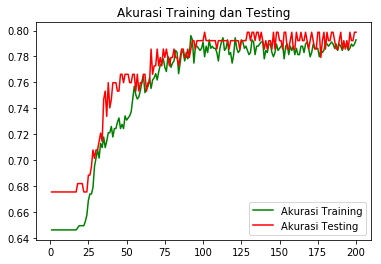

In [47]:
plt.plot(epochs, acc, 'b',color='green', label='Akurasi Training')
plt.plot(epochs, val_acc, 'b',color='red', label='Akurasi Testing')
plt.title('Akurasi Training dan Testing')
plt.legend()
plt.show()

# 2. Model Loss

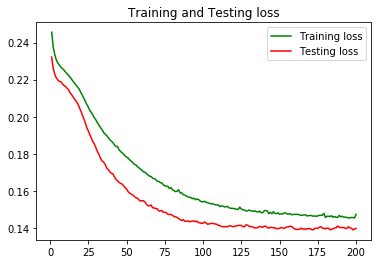

In [48]:
plt.plot(epochs, loss, 'b',color='green', label='Training loss')
plt.plot(epochs, val_loss, 'b',color='red', label='Testing loss')
plt.title('Training and Testing loss')
plt.legend()
plt.show()

In [3]:
#exmple of a box nd whisker plot
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot

seed(7)
pyplot.boxplot(dataset)

#show line plot
pyplot.show()

NameError: name 'dataset' is not defined

### Performence  Akurasi Training and Testing

In [ ]:
train_acc= model.evaluate(training_feature,training_label)
print(train_acc[1]*100)

In [ ]:
test_acc= model.evaluate(testing_feature,testing_label)
print(test_acc[1]*100)

### Load Confusion Matrik

# Performance
Setelah mendapatkan hasil singkay dari proses training pada model diatas, selanjutnya dapat dilakukan analisis performance dengan membuat confusion matrix dari Y yang telah diubah menjadi categorical dan nilai prediksi dari model Neural Network terhadap X yang telah diprocessing.



In [ ]:
predict= model.predict(testing_feature)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testing_label.argmax(axis=1), predict.argmax(axis=1))

In [31]:
cm

array([[88, 16],
       [20, 30]], dtype=int64)

# 1.Precision


Presisi adalah ukuran yang memberi tahu berapa proporsi pasien yang didiagnosa menderita kanker yang sebenarnya memang menderita kanker.

In [32]:
presisi=(88/(88+16))*100

In [33]:
print(presisi)

84.61538461538461


In [34]:
recall=(88/(88+20))*100

In [35]:
print(recall)

81.48148148148148


# 2.Akurasi

Akurasi dalam masalah klarifikasi adalah jumlah prediksi yang tepat yang dibuat oleh model atas semua jenis prediksi yang dibuat.

In [36]:
accuracy=((88+30)/(88+30+16+20))*100

In [37]:
print(accuracy)

76.62337662337663
